# Analysing Seattle, Boston AirBnb Datasets

For this project i will follow the following steps using Cross-industry standard process for data mining(CRISP-DM)

1. Business Understanding
2. Data Understanding
3. Prepare data
4. Data Modeling
5. Evaluate The results
6. Deploy

# Business Understanding

What kind of answers we get from the data using the below questions

1. How do price increase/decrease in a season and peak season?
2. What are the important factors that influence price in both cities?
3. Price differnce between two cities?
4. How many properties owned by host/vendor?
5. Analyze what do people think about AirBnb based on reviews?

# Data Understanding

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from os import path, getcwd
import seaborn as sns
from datetime import datetime
from sklearn.impute import SimpleImputer

In [357]:
# current path
cwd = path.join(getcwd(), 'data')

# data folders
cities = ['boston','seattle']

In [358]:
# seattle read data

seattle_listings = pd.read_csv(path.join(cwd, cities[0], 'listings.csv'))
seattle_reviews  = pd.read_csv(path.join(cwd, cities[0], 'reviews.csv'))
seattle_calendar  = pd.read_csv(path.join(cwd, cities[0], 'calendar.csv'))

sea_lis = seattle_listings
sea_rev = seattle_reviews
sea_cal = seattle_calendar

In [359]:
# boston data

boston_listings = pd.read_csv(path.join(cwd, cities[1], 'listings.csv'))
boston_reviews = pd.read_csv(path.join(cwd, cities[1], 'reviews.csv'))
boston_calendar  = pd.read_csv(path.join(cwd, cities[0], 'calendar.csv'))

bos_lis = boston_listings
bos_rev = boston_reviews
bos_cal = boston_calendar

In [360]:
# print seattle rows and columns

sea_lis.shape, sea_rev.shape, sea_cal.shape

((3585, 95), (68275, 6), (1308890, 4))

In [361]:
# print boston rows and colimns

bos_lis.shape, bos_rev.shape, bos_cal.shape

((3818, 92), (84849, 6), (1308890, 4))

In [362]:
## Unify columns
sea_lis = sea_lis[bos_lis.columns]

In [363]:
sea_rev.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [364]:
sea_lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [365]:
bos_lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


# Prepare data

In [366]:
bos_cal.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [367]:
bos_rev.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [368]:
# analyze and remove unwanted columns
bos_lis.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [406]:
# remove columsns that are not required

# cols = ['listing_url', 'scrape_id', 'last_scraped', 'name','summary',
#        'space', 'description', 'experiences_offered', 'neighborhood_overview',
#        'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
#        'xl_picture_url','host_url', 'host_name','host_location', 'host_about',
#         'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
#        'street', 'neighbourhood', 'neighbourhood_cleansed',
#        'neighbourhood_group_cleansed', 'city', 'state','market',
#        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
#        'calendar_last_scraped','calendar_last_scraped','requires_license',
#        'license', 'jurisdiction_names','host_id','host_listings_count', 
#           'host_total_listings_count','host_verifications',]

cols = ['id','host_since','host_id','host_response_time',
       'host_response_rate', 'host_is_superhost','host_verifications',
       'zipcode','is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price','guests_included','neighbourhood_cleansed', 'extra_people', 'minimum_nights',
       'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365','number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy','review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture','require_guest_phone_verification',
       'calculated_host_listings_count','reviews_per_month']

sea_lis_1 = sea_lis[cols]
bos_lis_1 = bos_lis[cols]
sea_rev_1 = sea_rev
bos_rev_1 = bos_rev
sea_cal_1 = sea_cal
bos_cal_1 = bos_cal
# len(cols)

After analysing the each column i finally choose 49 columns that are required to analyze 
my questions

In [407]:
# seattle missing value in columns
sea_lis_col_miss = set(sea_lis.columns[sea_lis.isnull().mean()>0.0001])
sea_rev_col_miss = set(sea_rev.columns[sea_rev.isnull().mean()>0.0001])
sea_cal_col_miss = set(sea_cal.columns[sea_cal.isnull().mean()>0.0001])

In [408]:
# boston missing value in columns
bos_lis_col_miss = set(bos_lis.columns[bos_lis.isnull().mean()>0.0001])
bos_rev_col_miss = set(bos_rev.columns[bos_rev.isnull().mean()>0.0001])
bos_cal_col_miss = set(bos_cal.columns[bos_cal.isnull().mean()>0.0001])

In [409]:
# find missing percentage seattle columns
sea_lis_colmiss_per = (sea_lis_1.isnull().sum()) / sea_lis.shape[0]
sea_rev_colmiss_per = (sea_rev_1.isnull().sum()) / sea_rev.shape[0]
sea_cal_colmiss_per = (sea_cal_1.isnull().sum()) / sea_cal.shape[0]

In [410]:
# find missing percentage boston columns
bos_lis_colmiss_per = (bos_lis_1.isnull().sum()) / sea_lis.shape[0]
bos_rev_colmiss_per = (bos_rev_1.isnull().sum()) / sea_rev.shape[0]
bos_cal_colmiss_per = (bos_cal_1.isnull().sum()) / sea_cal.shape[0]

In [411]:
sea_lis_colmiss_per

id                                  0.000000
host_since                          0.000000
host_id                             0.000000
host_response_time                  0.131381
host_response_rate                  0.131381
host_is_superhost                   0.000000
host_verifications                  0.000000
zipcode                             0.010600
is_location_exact                   0.000000
property_type                       0.000837
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.003905
bedrooms                            0.002789
beds                                0.002510
bed_type                            0.000000
amenities                           0.000000
price                               0.000000
guests_included                     0.000000
neighbourhood_cleansed              0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_ni

In [412]:
sea_rev_colmiss_per

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000776
dtype: float64

In [413]:
sea_cal_colmiss_per

listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64

In [414]:
bos_lis_colmiss_per

id                                  0.000000
host_since                          0.000558
host_id                             0.000000
host_response_time                  0.145886
host_response_rate                  0.145886
host_is_superhost                   0.000558
host_verifications                  0.000000
zipcode                             0.001953
is_location_exact                   0.000000
property_type                       0.000279
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.004463
bedrooms                            0.001674
beds                                0.000279
bed_type                            0.000000
amenities                           0.000000
price                               0.000000
guests_included                     0.000000
neighbourhood_cleansed              0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_ni

In [415]:
bos_rev_colmiss_per

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000264
dtype: float64

In [416]:
bos_cal_colmiss_per

listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64

In [417]:
# for testing on datasets

# from collections import Counter

# c = Counter(list(zip(df.host_id)))

# sea_lis['host_id'].value_counts()
# sea_lis['host_response_time'].value_counts()

In [418]:
# remove columsn with missing values more than 20 percent
# sea_lis = sea_lis_colmiss_per.loc[:, sea_lis_colmiss_per.mean() > 0.2]
sea_lis_2 = sea_lis_1.drop(columns=sea_lis_colmiss_per[sea_lis_colmiss_per>.2].index.values)
sea_lis_2

,id,host_since,host_id,host_response_time,host_response_rate,host_is_superhost,host_verifications,zipcode,is_location_exact,property_type,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,12147973,2015-04-15,31303940,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews']",02131,t,House,...,0,0,0,0,0,f,moderate,f,f,1
1,3075044,2012-06-07,2572247,within an hour,100%,f,"['email', 'phone', 'facebook', 'linkedin', 'am...",02131,t,Apartment,...,26,54,84,359,36,t,moderate,f,f,1
2,6976,2009-05-11,16701,within a few hours,100%,t,"['email', 'phone', 'reviews', 'jumio']",02131,t,Apartment,...,19,46,61,319,41,f,moderate,t,f,1
3,1436513,2013-04-21,6031442,within a few hours,100%,f,"['email', 'phone', 'reviews']",NaN,f,House,...,6,16,26,98,1,f,moderate,f,f,1
4,7651065,2014-05-11,15396970,within an hour,100%,t,"['email', 'phone', 'reviews', 'kba']",02131,t,House,...,13,34,59,334,29,f,flexible,f,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,2014-07-31,19246369,within an hour,96%,f,"['email', 'phone', 'reviews', 'jumio']",02143,t,Apartment,...,21,51,81,356,4,t,strict,f,f,8
3581,14844274,2015-07-02,37366454,a few days or more,10%,f,"['email', 'phone', 'reviews', 'weibo', 'jumio']",02446,f,Apartment,...,29,59,89,364,0,f,strict,f,f,2
3582,14585486,2014-01-14,11311919,within a day,78%,f,['phone'],02141,f,Apartment,...,0,15,40,40,0,f,flexible,f,f,1
3583,14603878,2016-05-27,74318064,within an hour,100%,f,"['email', 'phone', 'google', 'reviews', 'jumio']",02145,t,Apartment,...,5,5,5,253,2,f,strict,f,f,1


In [419]:
# remove columsn with missing values more than 16 percent
# bos_lis = bos_lis_colmiss_per.loc[:, bos_lis_colmiss_per.mean() > 0.2]
bos_lis_2 = bos_lis_1.drop(columns=bos_lis_colmiss_per[bos_lis_colmiss_per>.16].index.values)
bos_lis_2

,id,host_since,host_id,host_response_time,host_response_rate,host_is_superhost,host_verifications,zipcode,is_location_exact,property_type,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,2011-08-11,956883,within a few hours,96%,f,"['email', 'phone', 'reviews', 'kba']",98119,t,Apartment,...,14,41,71,346,207,f,moderate,f,f,2
1,953595,2013-02-21,5177328,within an hour,98%,t,"['email', 'phone', 'facebook', 'linkedin', 're...",98119,t,Apartment,...,13,13,16,291,43,f,strict,t,t,6
2,3308979,2014-06-12,16708587,within a few hours,67%,f,"['email', 'phone', 'google', 'reviews', 'jumio']",98119,t,House,...,1,6,17,220,20,f,strict,f,f,2
3,7421966,2013-11-06,9851441,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",98119,t,Apartment,...,0,0,0,143,0,f,flexible,f,f,1
4,278830,2011-11-29,1452570,within an hour,100%,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",98119,t,House,...,30,60,90,365,38,f,strict,f,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,2015-04-13,31148752,within a few hours,99%,f,"['email', 'phone', 'linkedin', 'reviews', 'jum...",98107,t,House,...,18,32,32,32,1,f,strict,f,f,8
3814,8902327,2015-10-14,46566046,within an hour,100%,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",98102,t,Apartment,...,6,26,44,273,2,f,moderate,f,f,1
3815,10267360,2015-12-30,52791370,NaN,NaN,f,['phone'],98178,f,House,...,29,59,88,88,0,f,moderate,f,f,1
3816,9604740,2015-01-03,25522052,within an hour,100%,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",98112,f,Condominium,...,30,60,90,179,0,f,moderate,f,f,1


In [420]:
sea_lis_3 = sea_lis_2.isnull().sum() 
sea_lis_3[sea_lis_3 > 0]
# sea_lis_3

host_response_time    471
host_response_rate    471
zipcode                38
property_type           3
bathrooms              14
bedrooms               10
beds                    9
dtype: int64

In [421]:
bos_lis_3 = bos_lis_2.isnull().sum()
bos_lis_3[bos_lis_3 > 1]
# bos_lis_3

host_since              2
host_response_time    523
host_response_rate    523
host_is_superhost       2
zipcode                 7
bathrooms              16
bedrooms                6
dtype: int64

fill the missing values with mean, mode using impute method

In [422]:

imp_mode = SimpleImputer(strategy='most_frequent')
sea_lis_2[['host_response_time','zipcode','property_type']] = imp_mode.fit_transform(sea_lis_2[['host_response_time','zipcode','property_type']])
sea_lis_2[['host_response_rate','bathrooms','bedrooms','beds']] = imp_mode.fit_transform(sea_lis_2[['host_response_rate','bathrooms','bedrooms','beds']])



In [423]:
sea_cal_1[['price']] = imp_mode.fit_transform(sea_cal_1[['price']])

In [424]:

imp_mode = SimpleImputer(strategy='most_frequent')
bos_lis_2[['host_is_superhost','host_since','host_response_time','zipcode']] = imp_mode.fit_transform(bos_lis_2[['host_is_superhost','host_since','host_response_time','zipcode']])
bos_lis_2[['host_response_rate','bathrooms','bedrooms','beds']] = imp_mode.fit_transform(bos_lis_2[['host_response_rate','bathrooms','bedrooms','beds']])


In [ ]:
bos_cal_1[['price']] = imp_mode.fit_transform(bos_cal_1[['price']])

In [ ]:
sea_lis_2.info()

In [ ]:
bos_lis_2.info()

# Transform certain features

In [ ]:
# clean price columns as it is string value because of symbols
s1 = '$296,05.00'
out = float(str(s1).replace(',', '').split('$')[-1])
# out = s1.extra_people.map(lambda str_price: str_price[1:]).str.replace(',', '').astype(float)
out


In [ ]:
def clean_price(price_conv):
    '''
    Converts USD prices from string to numeric format
    
    Args:
        price_conv (string): USD price in string format (e.g., '$123,456.00')
    
    Returns:
        out (float): USD price in numeric format (e.g., 123456.00)
    '''
    out = float(str(price_conv).replace(',', '').split('$')[-1])
    return out
    

In [ ]:
bos_cal_1.head(2)

In [ ]:
def bool_to_num(s):
    '''
    Converts "first letter boolean" strings to integers
    
    Args:
        bool_string (string): 't', 'f' or other
    
    Returns:
        bool_number (int): 1, 0 or None
    '''
    
    if s == 'f':
        return 0
    elif s == 't':
        return 1
    return None

In [ ]:
# a = '2019-08-15'
# b = '2018-07-13'

In [ ]:
# (date_format(a) - date_format(b)).days

In [ ]:
def date_format(dat):
    '''
    Converts "string to date
    
    '''
    string = datetime.strptime(dat,"%Y-%M-%d")
#     string = str(dat).replace('-',', ').strip('')
#     if string.startswith("'") and string.endswith("'"):
#     string = string[1:-1]
    print(type(string))
    return string

date_format(a)


In [ ]:
print(sea_lis_2['zipcode'])

In [ ]:
# ## Zipcode: remove unnecessary details or typos
# ## extract numbers 
# sea_lis_2.zipcode[sea_lis_2.zipcode.str.contains('[^0-9]', regex=True)] = sea_lis_2.zipcode.str.extract(r'(?:[^0-9])(\d+)')[0].value_counts().index[0]
# bos_lis_2.zipcode = bos_lis_2.zipcode.str.extract(r'(\d+)(?<![^0-9])')[0]

In [ ]:
print(sea_lis_2['price'])

In [ ]:
print(sea_lis_2['extra_people'])

In [ ]:
## Price & extra_people: str -> float
## drop '$' and ','
sea_lis_2.price = sea_lis_2['price'].apply(clean_price)
bos_lis_2.price = bos_lis_2['price'].apply(clean_price)
sea_lis.extra_people = sea_lis_2['extra_people'].apply(clean_price)
bos_lis.extra_people = bos_lis_2['extra_people'].apply(clean_price)

In [ ]:
print(sea_lis_2['host_since'])

In [ ]:
## host_since: change to days (difference of last day of dataframe and host_since)
## Get last day as baseline point
from datetime import date
sea_now = sea_lis_2.host_since.max()
bos_now = bos_lis_2.host_since.max()

# print(type(sea_now))
# print(type(sea_lis_2['host_since']))
# sea_lis_2['host_since'] = sea_lis_2['host_since'].apply(date_format)
# bos_lis_2['host_since'] = bos_lis_2['host_since'].apply(date_format)

## retrieve days of difference from basline date
sea_lis_2['host_days'] = sea_lis_2.host_since.map(lambda x: (date_format(sea_now) - date_format(x)).days)
bos_lis_2['host_days'] = bos_lis_2.host_since.map(lambda x: (date_format(bos_now) - date_format(x)).days)
# ## drop host_since column
sea_lis_2 = sea_lis_2.drop(columns=['host_since'])
bos_lis_2 = bos_lis_2.drop(columns=['host_since'])

In [ ]:
## host_verifications 
### seattle
sea_lis_2.host_verifications = sea_lis_2.host_verifications.replace(['[]', 'None'], "['none']")
### define seattle categorical dummy dataframe
sea_lis_2 = pd.get_dummies(sea_lis_2.host_verifications.map(literal_eval).apply(pd.Series).stack(), prefix='host_ver').sum(level=0)
### boston
bos_lis_2.host_verifications = bos_lis_2.host_verifications.replace(['[]', 'None'], "['none']")
### define boston categorical dummy dataframe
bos_lis_2 = pd.get_dummies(bos_lis_2.host_verifications.map(literal_eval).apply(pd.Series).stack(), prefix='host_ver').sum(level=0)
### unify column width and order
bos_cat['host_ver_photographer'] = 0
bos_cat.columns = sea_cat.columns
## drop host_verifications from sea_df, bos_df
sea_lis_2 = sea_lis_2.drop(columns=['host_verifications'])
bos_lis_2 = bos_lis_2.drop(columns=['host_verifications'])

In [ ]:
## amenities
### change format to string list same as host_verifications
sea_lis_2['amenities'] = sea_lis_2['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")]).astype(str)
bos_lis_2['amenities'] = bos_lis_2['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")]).astype(str)

### seattle
sea_lis_2.amenities = sea_lis_2.amenities.replace("['']", "['none']")
### boston
bos_lis_2.amenities = bos_lis_2.amenities.replace("['']", "['none']")
## temporary dataframe before adding to sea_cat
temp1 = pd.get_dummies(sea_lis_2.amenities.map(literal_eval).apply(pd.Series).stack(), prefix='amenities').sum(level=0)
## temporary dataframe before adding to bos_cat
temp2 = pd.get_dummies(bos_lis_2.amenities.map(literal_eval).apply(pd.Series).stack(), prefix='amenities').sum(level=0)
### unify column width and order
cols = ['amenities_Free Parking on Street',
        'amenities_Paid Parking Off Premises',
        'amenities_translation missing: en.hosting_amenity_49',
        'amenities_translation missing: en.hosting_amenity_50']
for col in cols:
    temp1[col] = 0
temp2.columns = temp1.columns
## concatenate dummy variable dataframes
sea_cat = pd.concat([sea_cat, temp1], axis=1)
bos_cat = pd.concat([bos_cat, temp2], axis=1)
## drop amenities from sea_df, bos_df
sea_lis_2 = sea_lis_2.drop(columns=['amenities'])
bos_lis_2 = bos_lis_2.drop(columns=['amenities'])

# Processing categorical variables

In [ ]:
# Processing categorical variables
sea_cat_2 = sea_lis_2.select_dtypes(include=[object]).drop(columns=['zipcode'])
bos_cat_2 = bos_lis_2.select_dtypes(include=[object]).drop(columns=['zipcode'])

In [ ]:
## get dummy variables for categoricals
bos_cat_2 = pd.get_dummies(bos_cat_2)
sea_cat_2 = pd.get_dummies(sea_cat_2)

## make column width same
for col in set(bos_cat_2.columns) - set(sea_cat_2.columns):
    sea_cat_2[col] = 0
    
## make column order same
sea_cat_2.columns = bos_cat_2.columns

## merge all categorical dataframes
sea_cat = pd.concat([sea_cat, sea_cat_2], axis=1)
bos_cat = pd.concat([bos_cat, bos_cat_2], axis=1)

In [ ]:
## putting it all together (df, num, cat)
sea_lis_2 = pd.concat([sea_lis_2[['id', 'host_id', 'zipcode', 'price']], sea_num, sea_cat], axis=1)
bos_lis_2 = pd.concat([bos_lis_2[['id', 'host_id', 'zipcode', 'price']], bos_num, bos_cat], axis=1)

## for EDA, getting not standardized numericals
sea_df_nostd = pd.concat([sea_lis_2[['id', 'host_id', 'zipcode', 'price']], sea_num_no_std, sea_cat], axis=1)
bos_df_nostd = pd.concat([bos_lis_2[['id', 'host_id', 'zipcode', 'price']], bos_num_no_std, bos_cat], axis=1)

In [ ]:
sea_lis_2.head(3)

# Processing numerical variables - Standardization

In [ ]:

## Retrieve numerical features
sea_num_no_std = sea_lis_2.select_dtypes(include=[int, float]).drop(columns=['id', 'host_id', 'price'])
bos_num_no_std = bos_lis_2.select_dtypes(include=[int, float]).drop(columns=['id', 'host_id', 'price'])

## make copy
sea_num = sea_num_no_std.copy()
bos_num = bos_num_no_std.copy()

## standardizing them
scaler = StandardScaler()
sea_num[sea_num.columns] = scaler.fit_transform(sea_num_no_std)
bos_num[bos_num.columns] = scaler.fit_transform(bos_num_no_std)

# Q1) How do price increase/decrease in a season and peak season?

In [110]:
# for this we take calendar data from both cities to analyze

In [111]:
price_cols = ['price']
bool_cols = ['available']

In [112]:
# clean price column
for col in price_cols:
    sea_cal_1[col] = sea_cal_1[col].apply(clean_price)
    bos_cal_1[col] = bos_cal_1[col].apply(clean_price)
    

In [113]:
# convert available column from bool to num
for col in bool_cols:
    sea_cal_1[col] = sea_cal_1[col].apply(bool_to_num)
    bos_cal_1[col] = bos_cal_1[col].apply(bool_to_num)

In [114]:
# calculate mean price for each month to analyze the peak season
# seattle dataset

sea_cal_1['year'] = pd.DatetimeIndex(sea_cal_1['date']).year
sea_cal_1['month'] = pd.DatetimeIndex(sea_cal_1['date']).month
sea_cal_1['price'] = sea_cal_1['price']

# boston dataset

bos_cal_1['year'] = pd.DatetimeIndex(bos_cal_1['date']).year
bos_cal_1['month'] = pd.DatetimeIndex(bos_cal_1['date']).month
bos_cal_1['price'] = bos_cal_1['price']

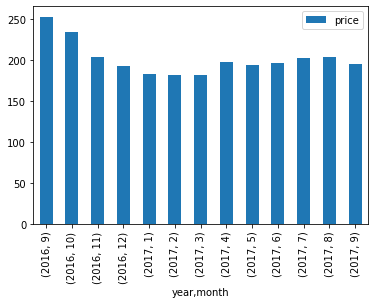

In [115]:
# plot seattle dataset

sea_cal_1.groupby(['year','month'])[['price']].mean().plot(kind='bar')

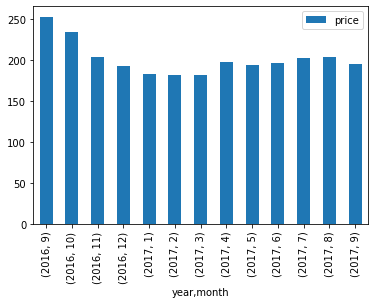

In [116]:
# plot seattle dataset

bos_cal_1.groupby(['year','month'])[['price']].mean().plot(kind='bar')

# Q2) What are the important factors that influence price in both cities?